## CAIXEIRO COM A GASOLINA INFINITA (E SEM CONSCIÊNCIA AMBIENTAL!!)

<hr>

## Introdução
Neste notebook, iremos resolver o problema do caixeiro viajante com a gasolina infinita, isto é, queremos encontrar o pior caminho possível para o caixeiro. O problema é do tipo NP-difícil.


A fim de resolver o problema, considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

## Objetivo

Encontre o caminho de *maior* distância no problema do caixeiro viajante e mostre ele de forma gráfica. Dica = Problema de Maximização.

## Importações

Todos os comandos de `import` devem estar dentro desta seção.

In [1]:
from itertools import permutations
from funcoes import cria_cidades
from funcoes import selecao_torneio_max as funcao_selecao
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

import random as rd
import matplotlib.pyplot as plt

### Vamos criar cidades?


<h4 style='text-align:justify'> PASSO 1 </h4>
Criar uma função que gera as cidades para que possamos encontrar a maior distância entre as cidades. Mas que cidades são essas? Pois bem! Vamos cria-lás por agora!

In [2]:
def cria_cidades(n):
    """Cria um dicionário aleatório de cidades com suas posições (x,y).

    Argumentos
      n: inteiro positivo
        Número de cidades que serão visitadas pelo caixeiro.

    Retorno:
      Dicionário contendo o nome das cidades como chaves e a coordenada no plano
      cartesiano das cidades como valores.
    """

    cidades = {}

    for i in range(n):
        cidades[f"Cidade {i}"] = (rd.random(), rd.random())

    return cidades

## Código e Discussões

<p style="text-align: justify">Esse problema é similar ao experimento A.06 em que temos o problema do caixeiro viajante com minimização, contudo, neste caso, vamos resolver o problema só que em uma situação em que o caixeiro é inimigo do meio ambiente e companheiro do agronegócio, isto é, desperdiça demais a gasolina devido o seu gosto por maximização. </p>
<h4 style='text-align:justify'> PASSO 2 </h4>
<p style="text-align: justify"> De modo a realizar o algoritmo genético, determina-se as constantes gerais do problema como o tamanho da população, número de gerações, número de combatentes do torneio e a probabilidade de cruzamento e mutação, além do número de cidades que serão utilizados no torneio para compararmos o maior caminho entre as cidades, o fitness será utilizado para essa métrica. </p>

In [3]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 1000

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 10
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

<h4 style='text-align:justify'> PASSO 3 </h4>
<p style="text-align: justify"> Nesse passo, há o desenvolvimento das funções locais para geração da população inicial - formada a partir das constantes determinadas; a função objetivo da população - uma função que recebe um indivíduo e retorna o seu valor de aptidão; e a função de seleção - dado o valor de aptidão determina-se quais genes vão ir para as seguintes gerações. </p>

In [4]:
#Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

<h4 style='text-align:justify'> PASSO 4 </h4>
<p style="text-align: justify"> Estabelecidas as constantes e funções, a primeira linha de código é responsável pela criação da população a partir das constantes estabelecidas. Em seguida, o nosso código irá percorrer em loop pelo número total de gerações estabelecido inicialmente, de modo aos indivíduos que formaram a população troquem as informações dos seus genes segundo o cruzamento estabelecido, criando novos individuos que solucionem o problema. </p>
<p style="text-align: justify"> Todo o processo é avaliado pelo fitness, uma função que recebe um indivíduo e retorna o seu valor de aptidão. Esse valor de aptidão é obtido através da distância percorrida pelo caixeiro seguindo o caminho contido no individuo.  </p>

In [5]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if rd.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness 

In [6]:
#Print dos resultados
print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 7', 'Cidade 6', 'Cidade 0', 'Cidade 3', 'Cidade 2', 'Cidade 5', 'Cidade 8', 'Cidade 4', 'Cidade 1', 'Cidade 9'] com distância: 9.217662817753206


### Vamos tentar permutar?
<h4 style='text-align:justify'> PASSO 5 </h4>
<p style="text-align: justify"> Este problema é de NP-dificíl. Logo, de modo a confirmar e comparar se o resultado obtido anteriormente é o melhor resultado, podemos utilizar do mecanismo de busca exaustiva para observarmos todas as permutações do conjunto dos genes, e comparar se ele é similar ou idêntico ao caminho encontrado pelo algoritmo genético. </p>


In [7]:
# Testando todas as permutações possíveis

melhor_fitness_ever = -float("inf")

for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho
        

### Comparação entre os resultados


In [8]:
# Checando os resultados
print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 7', 'Cidade 6', 'Cidade 0', 'Cidade 3', 'Cidade 2', 'Cidade 5', 'Cidade 8', 'Cidade 4', 'Cidade 1', 'Cidade 9'] com distância: 9.217662817753206

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 3', 'Cidade 7', 'Cidade 8', 'Cidade 5', 'Cidade 4', 'Cidade 1', 'Cidade 9', 'Cidade 2', 'Cidade 6') com distância: 9.217662817753206


### Bora graficar??

In [9]:
# Percorrer as opções 
grafinho = [] 

for i in melhor_individuo_ja_visto:
    grafinho.append(CIDADES[str(i)])
print(grafinho)

[(0.12794531938504805, 0.0025253950279664483), (0.8274722702197465, 0.660162994512924), (0.15688572446957738, 0.20314213235737133), (0.9909586171227622, 0.8928375489828176), (0.04885704241225375, 0.019361389112374727), (0.9039497548359201, 0.3222315013905015), (0.4434617814984574, 0.7035999213647989), (0.15127507823887543, 0.906795064157278), (0.2632302818406622, 0.14228434971823245), (0.8002329157520183, 0.8334728010949798)]


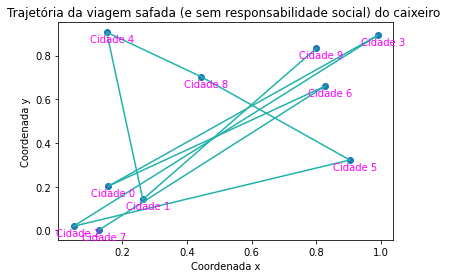

In [10]:
# Plotar no gráfico os resultados obtidos anteriormente 
x = [ponto[0] for ponto in grafinho]
y = [ponto[1] for ponto in grafinho]

for n, nome in enumerate(melhor_individuo_ja_visto):
    plt.annotate(nome, (x[n], y[n]), textcoords = "offset points", xytext=(5, -10), ha='center', color = 'fuchsia')
    
#Plotando os pontos

plt.plot(x,y, 'o')

#liga os pontos com segmentos de reta

for e in range(len(grafinho)-1):
    plt.plot([grafinho[e][0], grafinho[e+1][0]], [grafinho[e][1], grafinho[e+1][1]], color = 'lightseagreen')
    
#Dando nome aos eixos

plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Trajetória da viagem safada (e sem responsabilidade social) do caixeiro ')

plt.show()

## Conclusão
<p style="text-align: justify"> O problema a ser resolvido consiste na descoberta da maior distância possível para o caixeiro viajante entre $n$ pontos no plano cartesiano (ou seja, $n$ pontos com coordenadas $(x,y)$). A rota pode se iniciar em qualquer um dos pontos disponíveis e deve terminar no ponto inicial, visitando todos os demais pontos apenas uma vez. É uma situação extremamente semelhante ao que ocorrer no experimento A0.6, com exceção de que dessa vez, o nosso caixeiro viajante é um personagem sem consciência social e amigo do agronegócio já que ele percorre de cidade a cidade a fim de vender os seus produtos sem se preocupar em economizar a gasolina! </p>
<p style="text-align: justify">  Este notebook nos permite duas análises importantes: a versatilidade dos algoritímos genéticos com problemas de maximização e também o uso de limitação para cumprir as exigências impostas, isto é, o viajante não pode passar mais de uma vez pela mesma cidade e ele precisava retornar para a cidade inicial. Essas características atribuem o exercício como NP dificíl, assim, deve-se determinar todas as situações possíveis para se conseguir determinar qual é de fato a melhor solução, isto é, o maior caminho a ser percorrido pelo caixeiro entre as cidades </p>
<p style="text-align: justify"> A estratégia utilizada para a resolução do desafio é a construção de funções, em especial, funções de cálculo de distância entre as cidades, a de mutação, cruzamento  e uma função de objetivo que vai solucionar o nosso problema. A primeira função se baseou na fórmula de cálculo euclidiano de dois pontos referentes a um ponto x e y, por sua vez, a função de cruzamento é de caráter de cruzamento ordenado. E por fim, desenvolveu-se a função objetivo que consistia de um loop que calculava as distâncias obtidas nos diferentes caminhos possíveis, retornando a maior distância possível. </p>

## Playground



Muito obrigada pela aula, Dani :)